<h1> Zadanie 1 </h1>


In [91]:
import numpy as np
import skimage as ski
import cv2
import matplotlib.pyplot as plt
from skimage.filters import try_all_threshold, threshold_li, threshold_otsu, rank, threshold_mean

from skimage.morphology import disk
from skimage import img_as_ubyte

Text(0, 0.5, 'piksele')

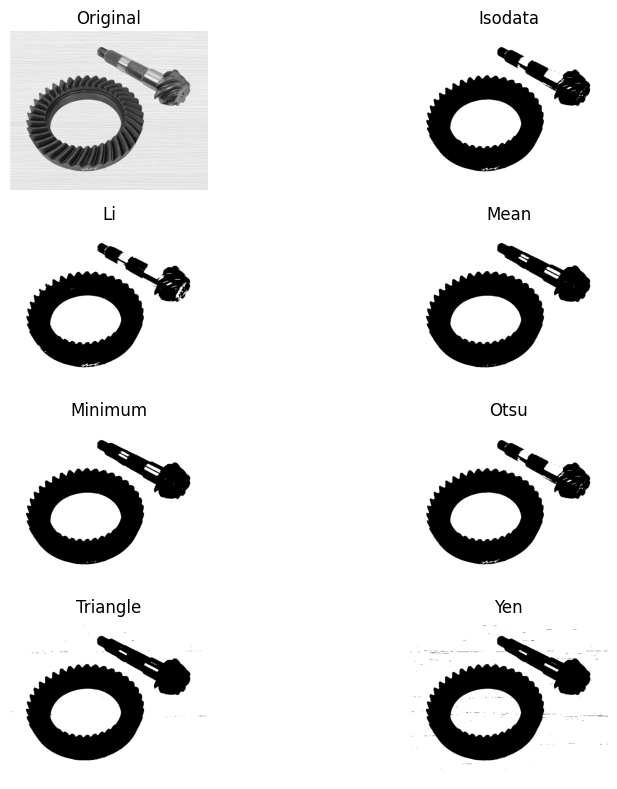

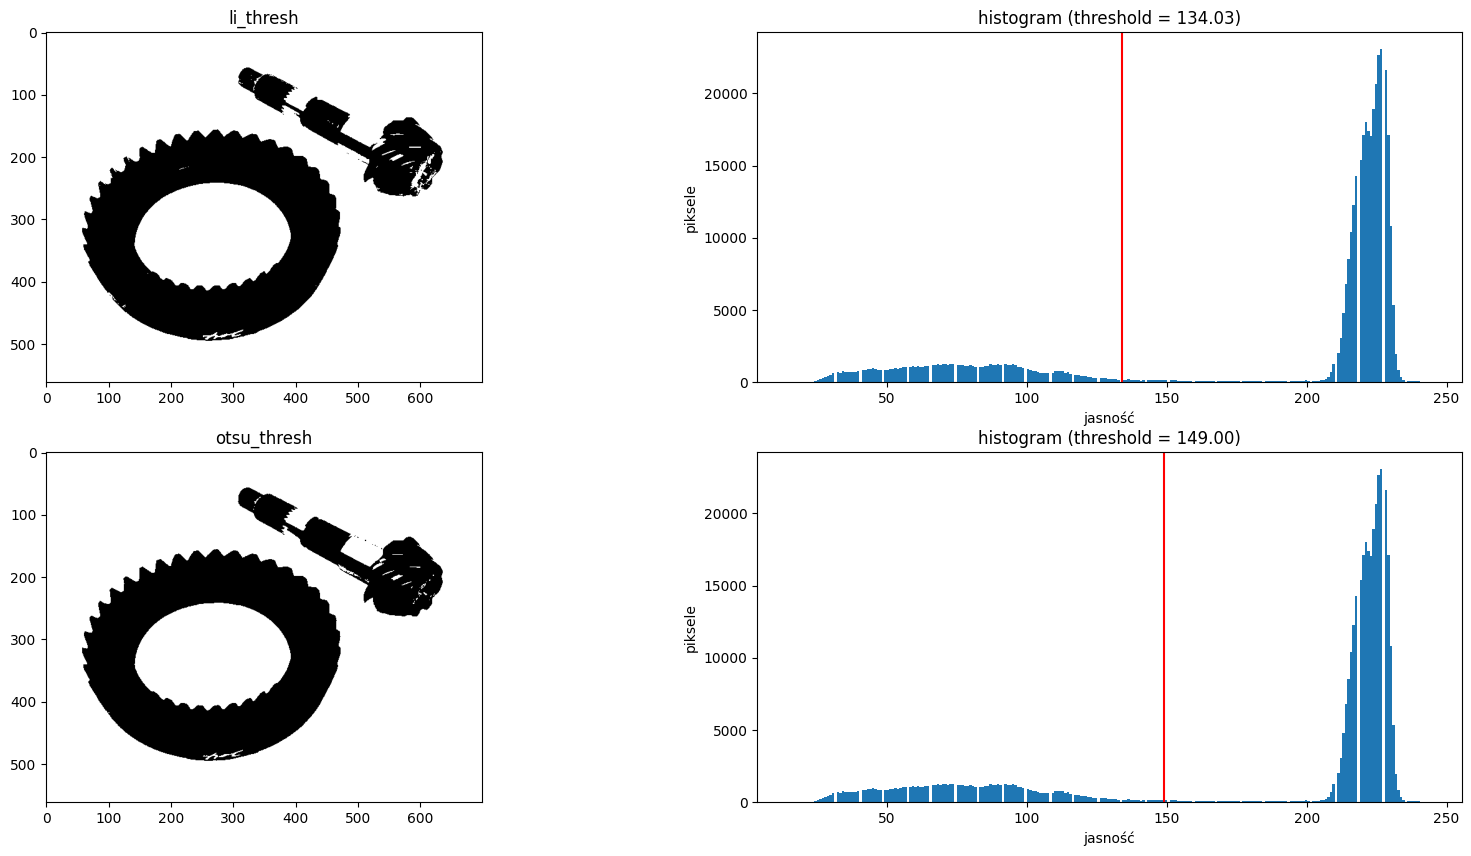

In [92]:
image = cv2.imread("gears1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)

li_thresh = threshold_li(image)
otsu_thresh = threshold_otsu(image)

li_binary = image > li_thresh
otsu_binary = image > otsu_thresh

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
plt.title("li_thresh")
plt.imshow(li_binary, cmap='gray')

plt.subplot(2,2,2)
plt.hist(image.ravel(), bins=256)
plt.title(f'histogram (threshold = {li_thresh:.2f})')
plt.axvline(li_thresh, color='r', label=f'Li Threshold: {li_thresh}')
plt.xlabel("jasność")
plt.ylabel("piksele")

plt.subplot(2,2,3)
plt.title("otsu_thresh")
plt.imshow(otsu_binary, cmap='gray')

plt.subplot(2,2,4)
plt.hist(image.ravel(), bins=256)
plt.title(f'histogram (threshold = {otsu_thresh:.2f})')
plt.axvline(otsu_thresh, color='r', label=f'Otsu Threshold: {otsu_thresh}')
plt.xlabel("jasność")
plt.ylabel("piksele")




<h1> Zadanie 2 </h1>


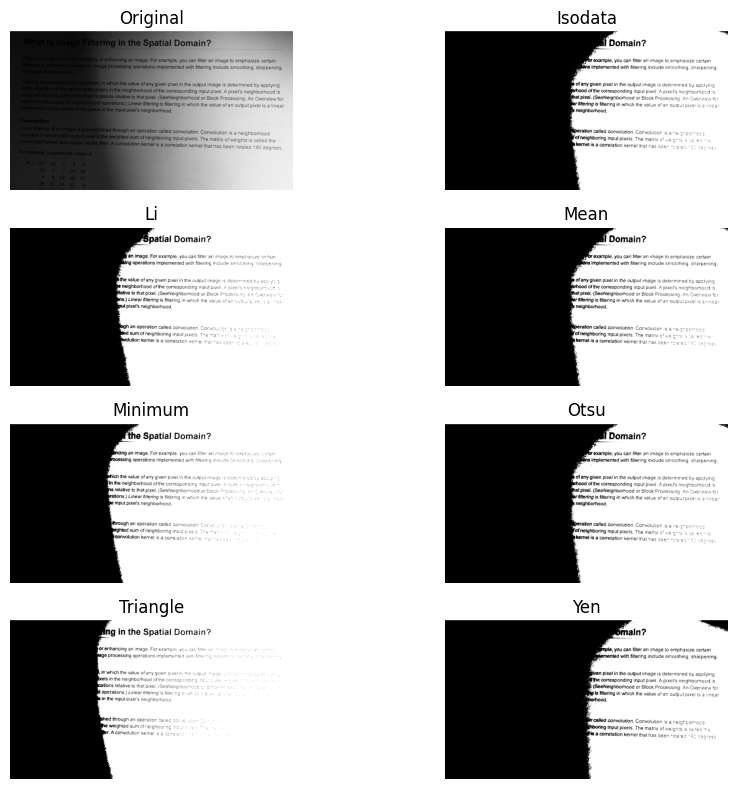

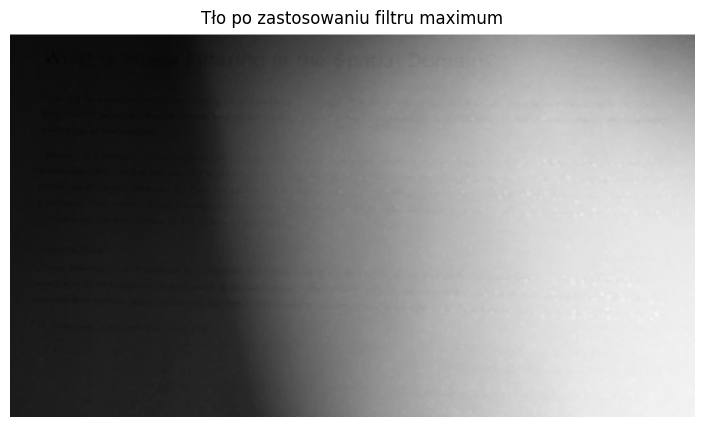

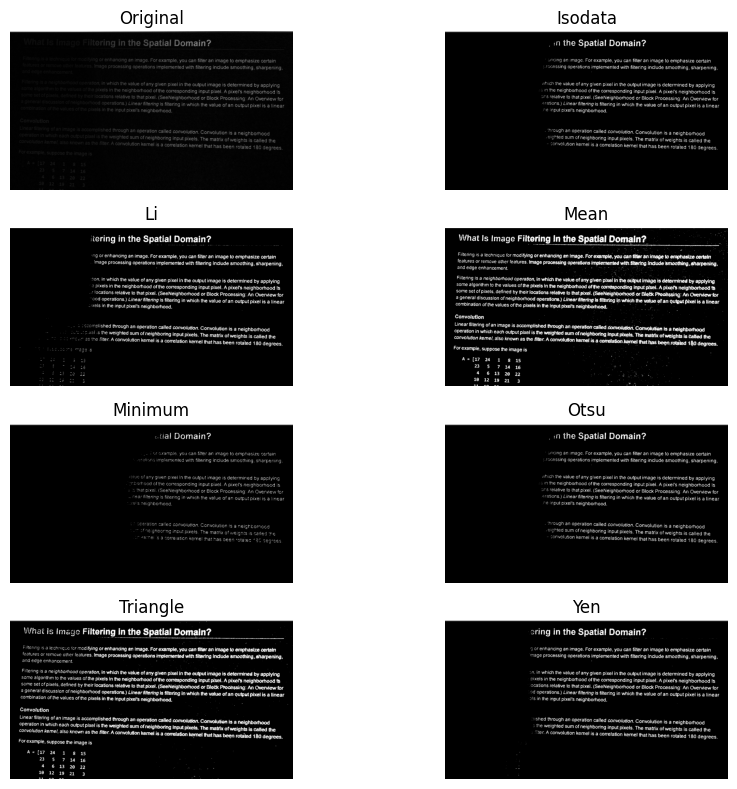

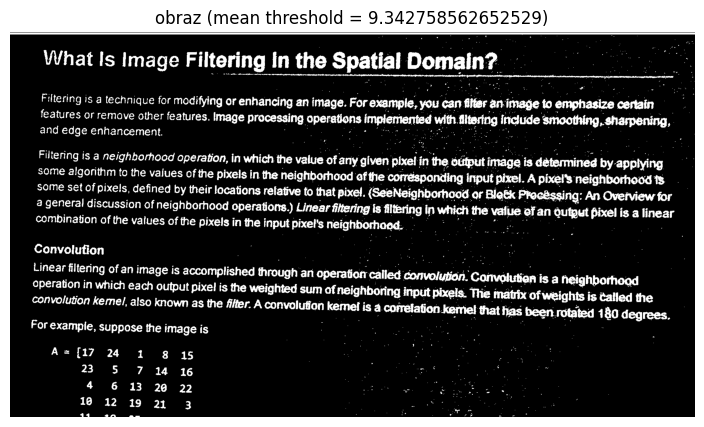

True

In [95]:

img = cv2.imread("printed_text.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

fix , ax = try_all_threshold(img, figsize=(10, 8), verbose=False)

tlo = rank.maximum(img,disk(5))
plt.figure(figsize=(10, 5))
plt.imshow(tlo, cmap='gray')
plt.title('Tło po zastosowaniu filtru maximum')
plt.axis('off')
plt.show()

obraz2 = tlo - img

fix , ax = try_all_threshold(obraz2, figsize=(10, 8), verbose=False)

mean_thresh = threshold_mean(obraz2)

mean_binary = obraz2 > mean_thresh

plt.figure(figsize=(10, 5))
plt.imshow(mean_binary, cmap='gray')
plt.title(f'obraz (mean threshold = {mean_thresh})')
plt.axis('off')
plt.show()

cv2.imwrite("binary_output.png", img_as_ubyte(mean_binary))

<h1> Zadanie 3 </h1>

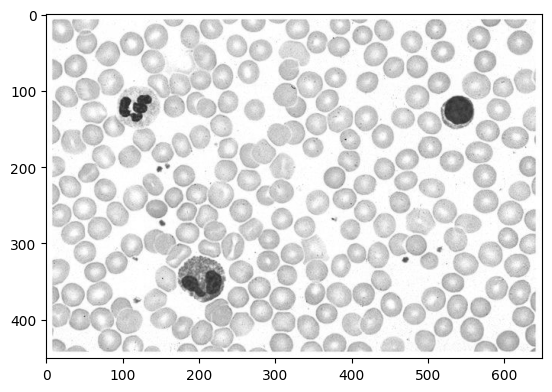

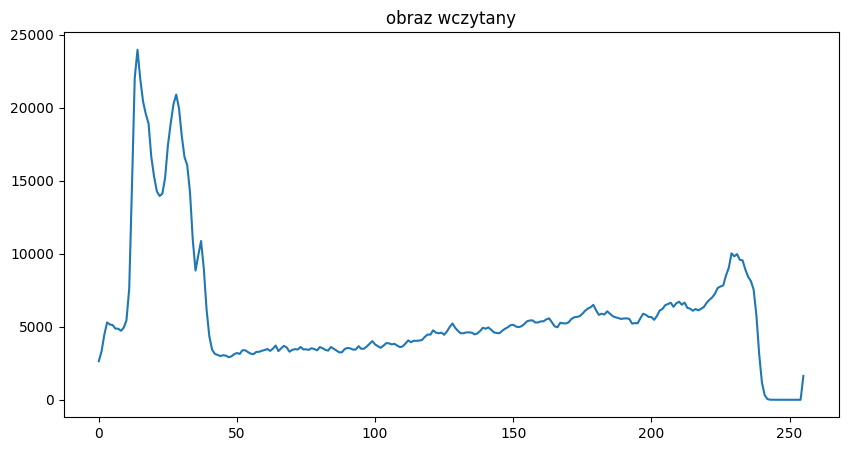

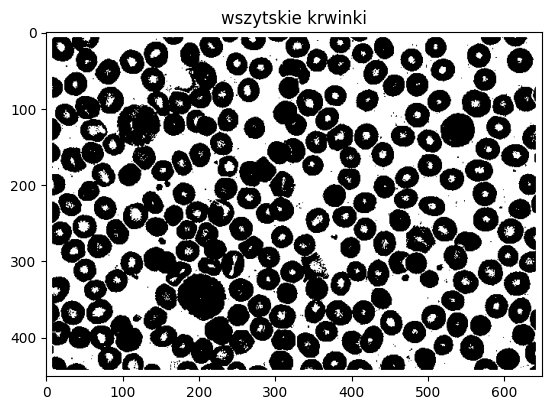

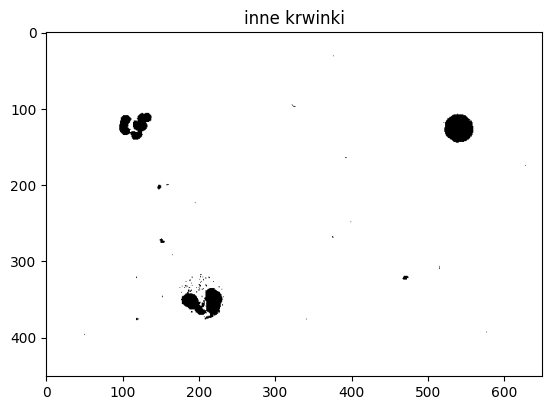

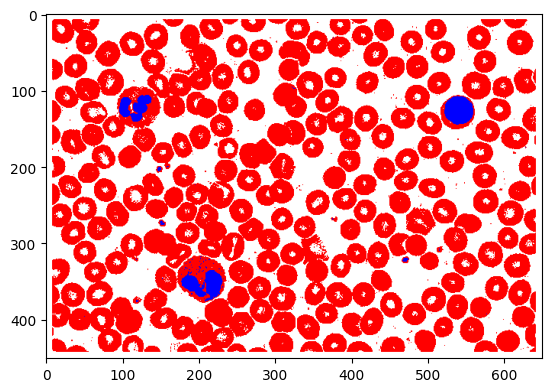

In [203]:
blood = cv2.imread("blood_smear.jpg")
blood = cv2.cvtColor(blood, cv2.COLOR_BGR2GRAY)
plt.imshow(blood, cmap='gray')

hist, bins = np.histogram(img.ravel(), bins=256, range=[0, 256])
plt.figure(figsize=(10, 5))
plt.title("obraz wczytany")
plt.plot(bins[:-1], hist)
plt.show()

prog1 = 235

obraz1 = blood > prog1
plt.imshow(obraz1, cmap='gray')
plt.title("wszytskie krwinki")
plt.show()


prog2 = 125

obraz2 = blood > prog2
plt.imshow(obraz2, cmap='gray')
plt.title("inne krwinki")
plt.show()


obraz3 = np.ones((obraz2.shape[0], obraz2.shape[1],3), dtype = np.float32)
obraz3[obraz1 == 0] = [1,0,0] # R
obraz3[obraz2 == 0] = [0,0,1] # B

plt.imshow(obraz3)
plt.show()


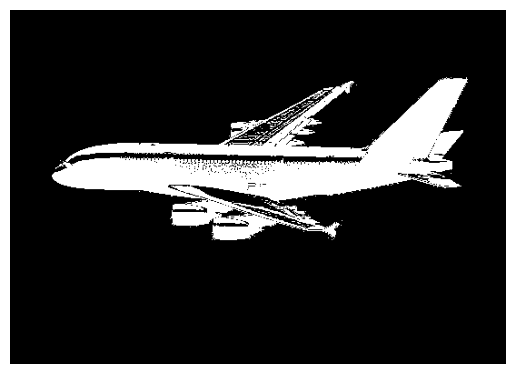

In [226]:
niebo = cv2.imread("airbus.png")
niebo = cv2.cvtColor(niebo, cv2.COLOR_BGR2RGB)

sr_niebo_R = np.average(niebo[:,:,0])
sr_niebo_G = np.average(niebo[:,:,1])
sr_niebo_B = np.average(niebo[:,:,2])
sr_niebo = np.array([sr_niebo_R, sr_niebo_G, sr_niebo_B])
maxDist = 0

for i in range(niebo.shape[0]):
    for j in range(niebo.shape[1]):
        pixel = niebo[i, j, :]
        dist = np.linalg.norm(pixel - sr_niebo)
        if dist > maxDist:
            maxDist = dist

obr = np.zeros((niebo.shape[0], niebo.shape[1]), dtype=np.float32)

distances = []

for i in range(niebo.shape[0]):
    for j in range(niebo.shape[1]):
        pixel = niebo[i, j, :]
        dist = np.linalg.norm(pixel - sr_niebo)
        distances.append(dist)

avgDist = np.mean(distances)

for i in range(niebo.shape[0]):
    for j in range(niebo.shape[1]):
        pixel = niebo[i, j, :]
        dist = np.linalg.norm(pixel - sr_niebo)
        if dist > avgDist:
            obr[i, j] = 1
        else:
            obr[i, j] = 0


plt.imshow(obr, cmap='gray')
plt.axis('off')
plt.show()
